In [1]:
!pip install yfinance pandas numpy statsmodels matplotlib

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-06-19')['Close']

[*********************100%***********************]  2 of 2 completed


In [14]:
returns = data.pct_change().dropna()
rf = 0.02 / 252  # Assume risk-free 2% annually
excess = returns.subtract(rf)
asset_excess = excess['AAPL']
market_excess = excess['^GSPC']


In [15]:
X = sm.add_constant(market_excess)  # adds alpha intercept
model = sm.OLS(asset_excess, X).fit()
alpha, beta = model.params
print(f"Alpha: {alpha:.5f}, Beta: {beta:.3f}")
print(model.summary())


Alpha: 0.00031, Beta: 1.197
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2334.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          3.28e-298
Time:                        17:26:45   Log-Likelihood:                 4064.3
No. Observations:                1372   AIC:                            -8125.
Df Residuals:                    1370   BIC:                            -8114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   

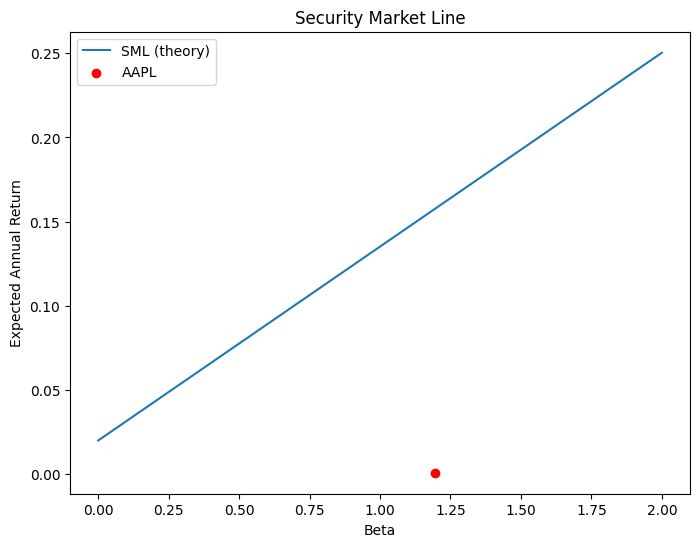

In [16]:
# Annualized market premium
market_premium = market_excess.mean() * 252

betas = np.linspace(0, 2, 50)
sml = rf * 252 + betas * market_premium

plt.figure(figsize=(8,6))
plt.plot(betas, sml, label='SML (theory)')
plt.scatter(beta, (alpha + beta * market_excess.mean()), color='red', label='AAPL')
plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.legend()
plt.title('Security Market Line')
plt.show()
